In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style="ticks")

In [ ]:
data = pd.read_csv('./student_spending_dirty.csv', sep=",")
# размер набора данных
data.shape

(1000, 18)

In [ ]:
# типы колонок
data.dtypes

Unnamed: 0                  float64
age                           int64
gender                       object
year_in_school               object
major                        object
monthly_income                int64
financial_aid                 int64
tuition                       int64
housing                       int64
food                          int64
transportation              float64
books_supplies              float64
entertainment               float64
personal_care               float64
technology                  float64
health_wellness             float64
miscellaneous               float64
preferred_payment_method     object
dtype: object

In [ ]:
data.isnull().sum()

Unnamed: 0                    1
age                           0
gender                      321
year_in_school                0
major                         0
monthly_income                0
financial_aid                 0
tuition                       0
housing                       0
food                          0
transportation                7
books_supplies                6
entertainment                 8
personal_care                16
technology                    5
health_wellness               2
miscellaneous                 9
preferred_payment_method      0
dtype: int64

In [ ]:
# Первые 5 строк датасета
data.head()

,Unnamed: 0,age,gender,year_in_school,major,monthly_income,financial_aid,tuition,housing,food,transportation,books_supplies,entertainment,personal_care,technology,health_wellness,miscellaneous,preferred_payment_method
0,0.0,19,NaN,Freshman,Psychology,958,270,5939,709,296,123.0,188.0,41.0,78.0,134.0,127.0,72.0,Credit/Debit Card
1,1.0,24,Female,Junior,Economics,1006,875,4908,557,365,85.0,252.0,74.0,92.0,226.0,129.0,68.0,Credit/Debit Card
2,2.0,24,NaN,Junior,Economics,734,928,3051,666,220,137.0,99.0,130.0,23.0,239.0,112.0,133.0,Cash
3,3.0,23,Female,Senior,Computer Science,617,265,4935,652,289,114.0,223.0,99.0,30.0,163.0,105.0,55.0,Mobile Payment App
4,4.0,20,Female,Senior,Computer Science,810,522,3887,825,372,168.0,194.0,48.0,NaN,88.0,NaN,104.0,Credit/Debit Card


In [ ]:
total_count = data.shape[0]
print('Всего строк: {}'.format(total_count))

Всего строк: 1000


# Простые стратегии - удаление или заполнение нулями
Будем удалять записи,где пропущено значение gender

In [ ]:
 data = data.dropna(axis=0, how='any', subset= [ 'gender', 'technology', 'health_wellness', 'transportation', 'books_supplies'])
 (data.shape)

(667, 18)

# "Внедрение значений" - импьютация (imputation)
Будем заполнять данными оставшиеся пустые колонки


In [ ]:
data.isnull().sum()

Unnamed: 0                   0
age                          0
gender                       0
year_in_school               0
major                        0
monthly_income               0
financial_aid                0
tuition                      0
housing                      0
food                         0
transportation               0
books_supplies               0
entertainment                6
personal_care               10
technology                   0
health_wellness              0
miscellaneous                8
preferred_payment_method     0
dtype: int64

In [ ]:
num_cols = []
for col in data.columns:
    # Количество пустых значений
    temp_null_count = data[data[col].isnull()].shape[0]
    dt = str(data[col].dtype)
    if temp_null_count>0 and (dt=='float64' or dt=='int64'):
        num_cols.append(col)
        temp_perc = round((temp_null_count / total_count) * 100.0, 2)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, temp_null_count, temp_perc))

Колонка entertainment. Тип данных float64. Количество пустых значений 6, 0.6%.
Колонка personal_care. Тип данных float64. Количество пустых значений 10, 1.0%.
Колонка miscellaneous. Тип данных float64. Количество пустых значений 8, 0.8%.


In [ ]:
# Фильтр по колонкам с пропущенными значениями
data_num = data[num_cols]
data_num

,entertainment,personal_care,miscellaneous
1,74.0,92.0,68.0
3,99.0,30.0,55.0
6,21.0,38.0,48.0
7,37.0,90.0,62.0
9,51.0,74.0,196.0
...,...,...,...
993,144.0,69.0,21.0
994,46.0,96.0,85.0
995,42.0,38.0,163.0
996,40.0,98.0,135.0


In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.impute import MissingIndicator

In [ ]:
imp_mean = SimpleImputer( strategy='most_frequent') # для импутации медианой замените 'mean' на 'median'
#imp_mean.fit(data)
data_transformed= imp_mean.fit_transform(data)

data.isnull().sum()
data_to_frame= pd.DataFrame(data_transformed,columns = data.columns)
data_to_frame.isnull().sum()


Unnamed: 0                  0
age                         0
gender                      0
year_in_school              0
major                       0
monthly_income              0
financial_aid               0
tuition                     0
housing                     0
food                        0
transportation              0
books_supplies              0
entertainment               0
personal_care               0
technology                  0
health_wellness             0
miscellaneous               0
preferred_payment_method    0
dtype: int64

Импьютировали все данные, включая категориальные признаки

# Преобразование категориальных признаков в числовые

In [ ]:
from sklearn.preprocessing import  OrdinalEncoder

In [ ]:
data_oe = data[['gender', 'year_in_school','major','preferred_payment_method']]
data_oe.head()

,gender,year_in_school,major,preferred_payment_method
1,Female,Junior,Economics,Credit/Debit Card
3,Female,Senior,Computer Science,Mobile Payment App
6,Female,Freshman,Engineering,Credit/Debit Card
7,Female,Junior,Economics,Mobile Payment App
9,Female,Junior,Computer Science,Mobile Payment App


In [ ]:
oe = OrdinalEncoder()
cat_enc_oe = oe.fit_transform(data_oe)
cat_enc_oe

array([[0., 1., 2., 1.],
       [0., 2., 1., 2.],
       [0., 0., 3., 1.],
       ...,
       [0., 2., 0., 0.],
       [0., 2., 0., 2.],
       [1., 1., 2., 2.]])

In [ ]:
# Наименования категорий в соответствии с порядковыми номерами
oe.categories_

[array(['Female', 'Male'], dtype=object),
 array(['Freshman', 'Junior', 'Senior', 'Sophomore'], dtype=object),
 array(['Biology', 'Computer Science', 'Economics', 'Engineering',
        'Psychology'], dtype=object),
 array(['Cash', 'Credit/Debit Card', 'Mobile Payment App'], dtype=object)]

In [ ]:
# Обратное преобразование
oe.inverse_transform(cat_enc_oe)

array([['Female', 'Junior', 'Economics', 'Credit/Debit Card'],
       ['Female', 'Senior', 'Computer Science', 'Mobile Payment App'],
       ['Female', 'Freshman', 'Engineering', 'Credit/Debit Card'],
       ...,
       ['Female', 'Senior', 'Biology', 'Cash'],
       ['Female', 'Senior', 'Biology', 'Mobile Payment App'],
       ['Male', 'Junior', 'Economics', 'Mobile Payment App']],
      dtype=object)

# Масштабирование данных

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer
sc1 = MinMaxScaler()
sc1_data = sc1.fit_transform(data[['financial_aid']])

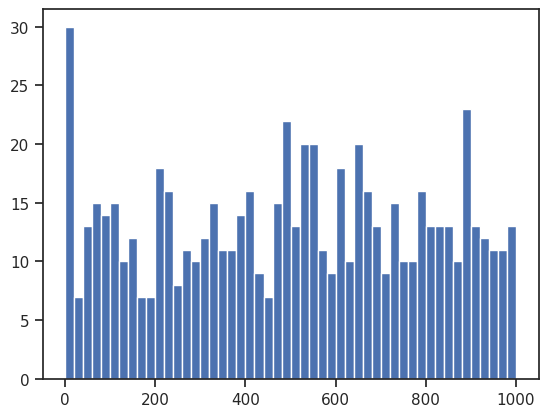

In [ ]:
plt.hist(data['financial_aid'], 50)
plt.show()

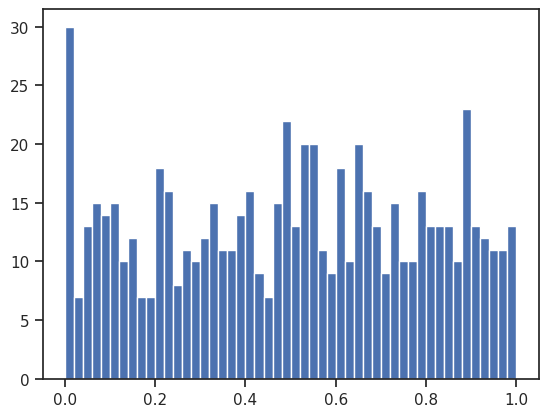

In [ ]:
plt.hist(sc1_data, 50)
plt.show()